# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import glob

In [ ]:
files = glob.glob('1Pstates*.csv')

In [ ]:
states_list = []
for filename in files:
    data = pd.read_csv(filename,index_col=0)
    states_list.append(data)

In [ ]:
states_list

[        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
 0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
 1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
 2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
 3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
 4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   
 5    Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%     NaN   
 
         Income            GenderPop  
 0  $43,296.36     2341093M_2489527F  
 1  $70,354.74       384160M_349215F  
 2  $54,207.82     3299088M_3342840F  
 3  $41,935.63     1451913M_1506295F  
 4  $67,264.78   19087135M_19334329F  
 5  $64,657.80     2648667M_2630239F  ,
                   State  TotalPop Hispanic   White   Black Native  Asian  \
 0              Colorado   5278906   20.78%  69.90%   3.55%  0.57%  2.66%   
 1           Connecticut   3593

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [ ]:
us_census = pd.concat(states_list)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [ ]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 5
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 5.2+ KB


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [ ]:
states_list

[        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
 0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
 1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
 2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
 3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
 4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   
 5    Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%     NaN   
 
         Income            GenderPop  
 0  $43,296.36     2341093M_2489527F  
 1  $70,354.74       384160M_349215F  
 2  $54,207.82     3299088M_3342840F  
 3  $41,935.63     1451913M_1506295F  
 4  $67,264.78   19087135M_19334329F  
 5  $64,657.80     2648667M_2630239F  ,
                   State  TotalPop Hispanic   White   Black Native  Asian  \
 0              Colorado   5278906   20.78%  69.90%   3.55%  0.57%  2.66%   
 1           Connecticut   3593

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [ ]:
us_census['Income'] = (
    us_census['Income']
    .astype(str)
    .str.replace(' ', '')        # xóa space giữa số
    .str.strip()                 # xóa space đầu/cuối
    .astype(float)
)


In [ ]:
us_census['Income']

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
Name: Income, dtype: float64

In [ ]:
us_census['Income'] = pd.to_numeric(us_census['Income'])
# convert to numeric value

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [ ]:
us_census['GenderPop'].unique()

array(['2341093M_2489527F', '384160M_349215F', '3299088M_3342840F',
       '1451913M_1506295F', '19087135M_19334329F', '2648667M_2630239F',
       '1751607M_1841615F', '448413M_478041F', '306674M_340810F',
       '9600009M_10045763F', '4883331M_5123362F', '709871M_696428F',
       '810464M_806083F', '6316899M_6556862F', '3235263M_3333382F',
       '1534595M_1558931F', '1439862M_1453125F', '2164208M_2233145F',
       '2261156M_2364097F', '650081M_679019F', '2872643M_F',
       '3249650M_3455936F', '4861973M_5038598F', '2692166M_2727005F',
       '1451723M_1536358F', '2964003M_3081445F', '510163M_F',
       '929606M_939759F', '1407735M_1390901F', '653484M_670717F',
       '4343027M_4561386F', '1032414M_1051703F', '9541801M_10131373F',
       '4795408M_5049925F', '367963M_353677F', '5662893M_5913084F',
       '1906944M_1942789F', '1948453M_1990780F', '6245344M_6534215F',
       '1713860M_1869213F', '510388M_543273F', '2322409M_2455167F',
       '423477M_419713F', '3167756M_3331859F', '131

In [ ]:
us_census['GenderPop'].str.split('_',expand = True )

,0,1
0,2341093M,2489527F
1,384160M,349215F
2,3299088M,3342840F
3,1451913M,1506295F
4,19087135M,19334329F
5,2648667M,2630239F
0,2648667M,2630239F
1,1751607M,1841615F
2,448413M,478041F
3,306674M,340810F


In [ ]:
us_census[['Men','Woman']]= us_census['GenderPop'].str.split('_',expand = True )


In [ ]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Woman
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43 296.36,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70 354.74,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54 207.82,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41 935.63,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67 264.78,19087135M_19334329F,19087135M,19334329F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [ ]:
us_census['Men'] = pd.to_numeric(us_census['Men'].str.replace('M',' '))

In [ ]:
us_census.dropna(inplace = True)

In [ ]:
us_census['Woman'].isnull().sum()

0

In [ ]:
us_census['Woman'] = pd.to_numeric(us_census['Woman'].str.replace('F',' '))

AttributeError: Can only use .str accessor with string values!

In [ ]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      52 non-null     object 
 1   TotalPop   52 non-null     int64  
 2   Hispanic   52 non-null     object 
 3   White      52 non-null     object 
 4   Black      52 non-null     object 
 5   Native     52 non-null     object 
 6   Asian      52 non-null     object 
 7   Pacific    52 non-null     object 
 8   Income     52 non-null     float64
 9   GenderPop  52 non-null     object 
 10  Men        52 non-null     int64  
 11  Woman      52 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 5.3+ KB


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

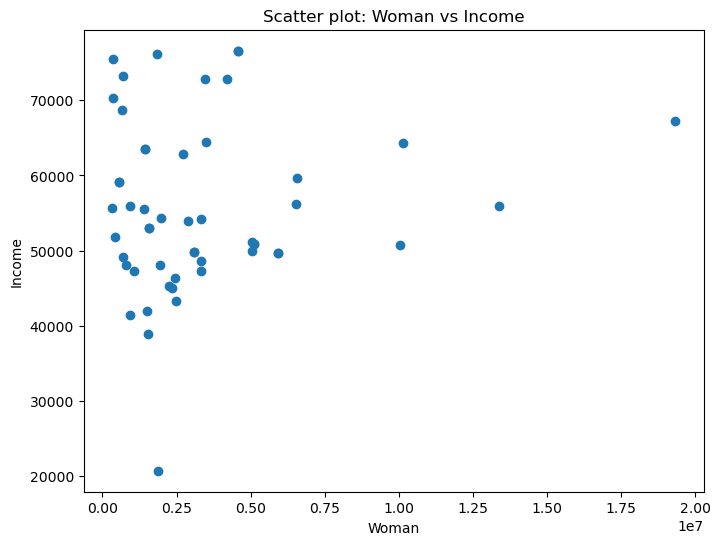

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(us_census['Woman'], us_census['Income'])
plt.xlabel('Woman')
plt.ylabel('Income')
plt.title('Scatter plot: Woman vs Income')
plt.show()


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   - We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   - You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [ ]:
minus=us_census['TotalPop'] - us_census['Men']

In [ ]:
us_census['Woman']=us_census['Woman'].fillna(minus)

In [ ]:
us_census['Woman'].isnull().sum()

0

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [ ]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 5
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      45 non-null     object 
 1   TotalPop   45 non-null     int64  
 2   Hispanic   45 non-null     object 
 3   White      45 non-null     object 
 4   Black      45 non-null     object 
 5   Native     45 non-null     object 
 6   Asian      45 non-null     object 
 7   Pacific    45 non-null     object 
 8   Income     45 non-null     float64
 9   GenderPop  45 non-null     object 
 10  Men        45 non-null     int64  
 11  Woman      45 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.6+ KB


11. Drop those duplicates using the `.drop_duplicates()` function.

In [ ]:
us_census.duplicated().sum()

0

In [ ]:
us_census.drop_duplicates(inplace=True)


In [ ]:
us_census.duplicated().sum()

0

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

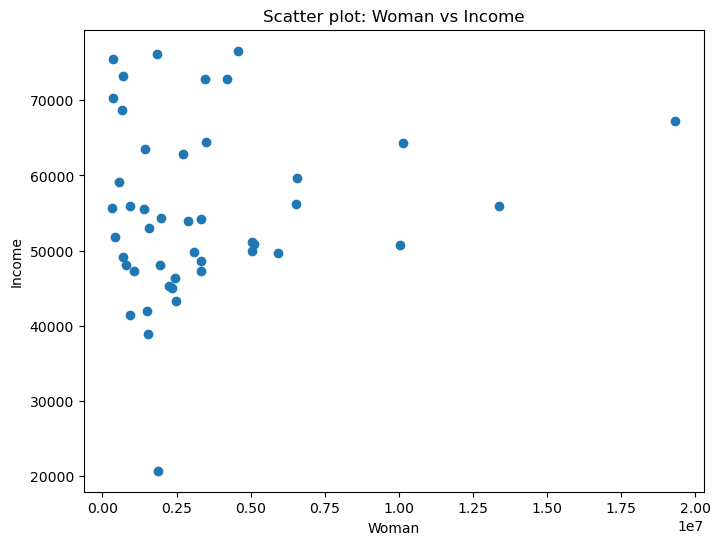

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(us_census['Woman'], us_census['Income'])
plt.xlabel('Woman')
plt.ylabel('Income')
plt.title('Scatter plot: Woman vs Income')
plt.show()
